In [59]:
import numpy as np
import sys
sys.path.append("../src/")

import matplotlib.pyplot as plt 
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

In [60]:
import dp_map
dpmap = dp_map.drake_passage_map(fig_label="b",fig_title="llc 4320 simulation")
m = dpmap.m

In [153]:
etopopath='/Users/crocha/Dropbox/Data/topo/ETOPO1_Ice_g_gdal.grd'
etopo = Dataset(etopopath)
x_range = etopo.variables['x_range'][:]
y_range = etopo.variables['y_range'][:]
spacing = etopo.variables['spacing'][0]

lont = np.arange(x_range[0],x_range[1]+spacing,spacing)
latt = np.arange(y_range[0],y_range[1]+spacing,spacing)

In [154]:
lonti,latti = np.meshgrid(lont,latt)
topo = np.reshape(np.array(etopo.variables['z']),lonti.shape)

In [155]:
topo = np.flipud(topo)

<matplotlib.colorbar.Colorbar instance at 0x1a987e680>

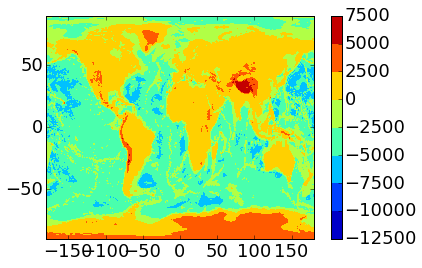

In [156]:
dec = 15
plt.contourf(lonti[::dec,::dec],latti[::dec,::dec],topo[::dec,::dec])
plt.colorbar()

Drake Passage topography

In [158]:
lont = lonti[0,:]
latt = latti[:,0]

ilat = (latt > m.latmin)&(latt < m.latmax)
ilon = (lont > m.lonmin)&(lont < m.lonmax)

topo_dp = topo[ilat,:]
topo_dp = topo_dp[:,ilon]

lont_dp = lont[ilon]
latt_dp = latt[ilat]

lont_dp.size

2152

<matplotlib.colorbar.Colorbar instance at 0x17ed57518>

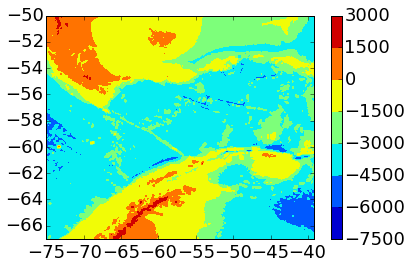

In [159]:
plt.contourf(lont_dp,latt_dp,topo_dp)
plt.colorbar()

In [185]:
fno =  Dataset('etopo1_dp.nc', 'w', format='NETCDF4')

In [186]:
lond = fno.createDimension('lond', lont_dp.size)
latd = fno.createDimension('latd', latt_dp.size)
lon = fno.createVariable('lon','f4',('lond'))
lat = fno.createVariable('lat','f4',('latd'))
topo = fno.createVariable('topo','f4',('latd','lond'))

In [187]:
lon[:] =  lont_dp
lat[:] =  latt_dp
topo[:] = topo_dp

fno.close()

In [188]:
np.savez('topo_dp.npz',lon=lont_dp,lat=latt_dp,topo=topo_dp)